# Optoelektronic

The characteristic curve is defined as 
$I(U)=I_s(e^{qU/(nkT)}-1)$, where $I_S$ is the saturation current, $k=1,38\cdot 10^{-23}Ws/K, q=1,602\cdot 10^{-19}As$ are Boltzmann's constant and elemenary charge. $U$ and $T$ are voltage and temperature.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
q=1.62e-19
k=1.38e-23

## LED of different color
Select the saturation current such, that the threshold voltage is in the range of the expected threshold of this diode type.

Text(0, 0.5, 'I/A')

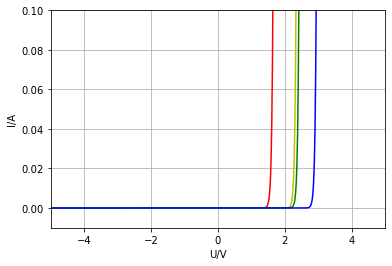

In [2]:
U=np.linspace(-5,5,num=1000)
Is=[1e-20,1e-28,1e-29,1e-35]
col=["r-","y-","g-","b-"]
T=273.16+20
n=1.5
for ii,iis in enumerate(Is):
    I=[]
    for u in U:
        I.append(iis*(np.exp(q*u/n/k/T)-1))
    plt.plot(U,I,col[ii])

plt.grid("both")
plt.axis([-5,5,-10e-3,100e-3])
plt.xlabel("U/V")
plt.ylabel("I/A")

## Defining Operation

This is a hort program, that determines an arbitrary operation point of the diode. 

Note: The root-searching algorithm should be the simple "bisect", beause "newton" and some other methods relying on slowly varying functions or calculate the derivative will not word due to the sharp ascent of the exponential function.


R=   10Ohm, Arbeitspunkt bei U=2.3651V und I=0.2635A
R=   12Ohm, Arbeitspunkt bei U=2.3584V und I=0.2201A
R=   15Ohm, Arbeitspunkt bei U=2.3502V und I=0.1767A
R=   22Ohm, Arbeitspunkt bei U=2.3360V und I=0.1211A
R=   27Ohm, Arbeitspunkt bei U=2.3284V und I=0.0989A
R=   33Ohm, Arbeitspunkt bei U=2.3210V und I=0.0812A
R=   39Ohm, Arbeitspunkt bei U=2.3149V und I=0.0688A
R=   47Ohm, Arbeitspunkt bei U=2.3080V und I=0.0573A
R=   56Ohm, Arbeitspunkt bei U=2.3015V und I=0.0482A
R=   68Ohm, Arbeitspunkt bei U=2.2943V und I=0.0398A
R=   82Ohm, Arbeitspunkt bei U=2.2874V und I=0.0331A
R=  100Ohm, Arbeitspunkt bei U=2.2801V und I=0.0272A
R=  120Ohm, Arbeitspunkt bei U=2.2733V und I=0.0227A
R=  150Ohm, Arbeitspunkt bei U=2.2651V und I=0.0182A
R=  220Ohm, Arbeitspunkt bei U=2.2509V und I=0.0125A
R=  270Ohm, Arbeitspunkt bei U=2.2434V und I=0.0102A
R=  330Ohm, Arbeitspunkt bei U=2.2359V und I=0.0084A
R=  390Ohm, Arbeitspunkt bei U=2.2298V und I=0.0071A
R=  470Ohm, Arbeitspunkt bei U=2.2229V und I=0

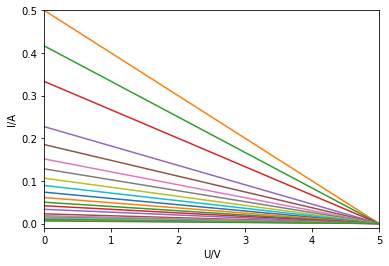

In [3]:
from scipy.optimize import fsolve,root,bisect
U0=5
E16=[1,1.2,1.5,2.2,2.7,3.3,3.9,4.7,5.6,6.8,8.2]
RR=[10*R for R in E16]
RR.extend(100*R for R in E16)

n=1.5
Is=1e-28

Idiod = lambda u: Is*(np.exp(q*u/n/k/T)-1)
plt.plot(u,Idiod(u)) # Zeichne die Diodenkennlinie
plt.axis([0,U0,-10e-3,500e-3])
u=np.linspace(-U0,U0,num=1000)
plt.xlabel("U/V")
plt.ylabel("I/A")


for R in RR:
    
    func= lambda u: U0-R*Idiod(u)-u
    plt.plot(u,U0/R-u/R) # Zeichne die AG der Quelle
    ulsg=bisect(func,0,U0)#,epsfcn=1e-40,xtol=1e-13)

    print("R=%5dOhm, Arbeitspunkt bei U=%5.4fV und I=%5.4fA"% 
          (R,ulsg,Idiod(ulsg)))
plt.show()
          

## Photodiode
Illumination will move the characterisitic curve downward.

$I(U)=I_s(e^{qU/(nkT)}-1)-I_K$

For this operation the third quadrant is used, where volatage and current are negative. Thus "real" direction of current and voltage are opposite of the arrows, diode is used reversed biases ($U<0$) and ist still a consumer, sinve voltage and current are in the same direction in the element.

It is important that the current is almost not dependent on the bias-voltage, but almost only dependent on the illumination.


Text(0, 0.5, 'I/A')

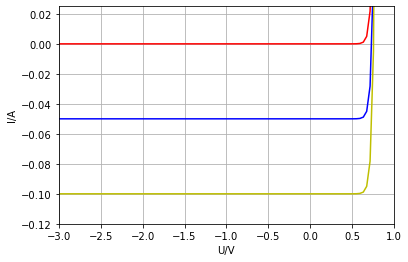

In [4]:
Idiod = lambda u,ik: Is*(np.exp(q*u/n/k/T)-1)-ik
col = ["r-","b-","y-","k-","g-"]

Is=1e-13
n=1.1
U=np.linspace(-3,1,num=100)
Ik=[0, 50e-3, 100e-3]
for ii,ik in enumerate(Ik):
    plt.plot(U,Idiod(U,ik),col[ii])
    
plt.axis([-3,1,-0.12,25e-3])
plt.grid("both")
plt.xlabel("U/V")
plt.ylabel("I/A")


## Solar Cell

In the end, the solar cell has the same characteristic curve as a "normal" diode or a photodiode, but the absorption of photons and the consequent generation of free electron-hole pairs shift the characteristic curve downwards:

$I(U) = I_s \left(e^{\frac{qU}{nkT}} - 1\right) - I_K$

Note: We will maintain the previously used direction of the current, so it is now negative. In some textbooks, $I(U)\rightarrow-I(U)$ is used, allowing the analysis to take place in the first quadrant of the characteristic curve. Here, we are working in the fourth quadrant.

The open-circuit voltage is obtained when $I(U) = 0$, so:

$U_0 = \left(\ln\left(\frac{I_K}{I_s}\right) + 1\right) \frac{nkT}{q}$

The goal for maximum efficiency is to determine the maximum power as $P = UI(U)$ and operate the solar cell at this operating point.



IK= 0.0000A, U0=0.0000V => P0ks=0.0000W, eta0=  inf %
Optimale Leistung P=0.0000W bei U=0.3653V und I=0.0000A
IK= 4.0000A, U0=0.8859V => P0ks=3.5435W, eta0=-83.5059 %
Optimale Leistung P=-2.9590W bei U=0.7712V und I=-3.8368A
IK= 8.0000A, U0=0.9089V => P0ks=7.2709W, eta0=-83.7946 %
Optimale Leistung P=-6.0926W bei U=0.7931V und I=-7.6823A


<ipython-input-5-3458d23605df>:19: RuntimeWarning: divide by zero encountered in double_scalars
  (ik,u0,ik*u0,power(u_opt)/(ik*u0)*100))


Text(0, 0.5, 'I/A bzw. P/W')

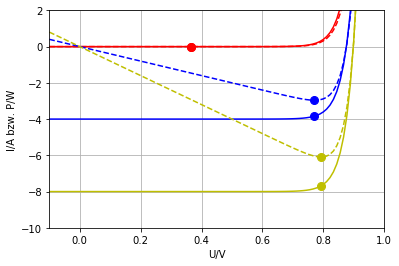

In [5]:
from scipy.optimize import minimize
Idiod = lambda u,ik: Is*(np.exp(q*u/n/k/T)-1)-ik
col = ["r-","b-","y-","k-","g-"]

Is=1e-11
n=1.1
T=350
U=np.linspace(-0.1,1,num=100)
Ik=[0, 4, 8]
for ii,ik in enumerate(Ik):
    plt.plot(U,Idiod(U,ik),col[ii])
    # Definiere den MPP (Maximum Power Point)
    power = lambda u: u*Idiod(u,ik)
    plt.plot(U,power(U),col[ii]+"-")
    u_opt=minimize(power,0.5)["x"][0]
    u0=n*k*T/1.6022e-19*(np.log(ik/Is+1))
    print("================================================================")
    print("IK= %5.4fA, U0=%5.4fV => P0ks=%5.4fW, eta0=%5.4f %%"% 
          (ik,u0,ik*u0,power(u_opt)/(ik*u0)*100))
    print("Optimale Leistung P=%5.4fW bei U=%5.4fV und I=%5.4fA"% 
          (power(u_opt),u_opt,Idiod(u_opt,ik)))
    plt.plot(u_opt, Idiod(u_opt,ik),col[ii], marker="o", markersize=8)
    plt.plot(u_opt, power(u_opt),col[ii], marker="o", markersize=8)
    
plt.axis([-0.1,1,-10,2])
plt.grid("both")
plt.xlabel("U/V")
plt.ylabel("I/A bzw. P/W")




## The Non-Ideal Solar Cell

Considering the parallel and series resistances (the direction of counting is reversed for simplicity), the following relationships hold for voltage (U) and current (I) at the output terminals of the solar cell:

$U = U_D - R_s I \Leftrightarrow U_D = U + R_s I$

$I = I_K - I_D(U_D) - \frac{U_D}{R_P}$

$\Leftrightarrow I = I_K - I_D(U + R_s I) - \frac{U + R_s I}{R_P}$

The equation that needs to have its root found to obtain the current (I) is:

$f(I): 0 = I_K - I_D(U + R_s I) - \frac{U}{R_P} - I \left(1 + \frac{R_s}{R_P}\right)$

How could the program be extended to determine the Maximum Power Point (MPP) in this case?


keine Lösung bei U=0.8909V, verwende I=0A
keine Lösung bei U=0.9091V, verwende I=0A
keine Lösung bei U=0.9273V, verwende I=0A
keine Lösung bei U=0.9455V, verwende I=0A
keine Lösung bei U=0.9636V, verwende I=0A
keine Lösung bei U=0.9818V, verwende I=0A
keine Lösung bei U=1.0000V, verwende I=0A
keine Lösung bei U=0.8909V, verwende I=0A
keine Lösung bei U=0.9091V, verwende I=0A
keine Lösung bei U=0.9273V, verwende I=0A
keine Lösung bei U=0.9455V, verwende I=0A
keine Lösung bei U=0.9636V, verwende I=0A
keine Lösung bei U=0.9818V, verwende I=0A
keine Lösung bei U=1.0000V, verwende I=0A


Text(0, 0.5, 'I/A')

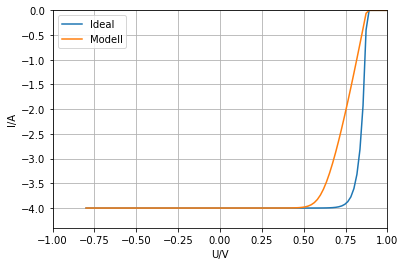

In [6]:
from scipy.optimize import bisect

Rs=0.05
Rp=10e3
Ik=4
U=np.linspace(-0.8,1,num=100)

def Idiod(u,Rs=0.1,Rp=10000,n=1.1,Ik=4,Is=1e-11):
    #print(u)
    f = lambda I: -Is*(np.exp(q*(u+Rs*I)/n/k/T)-1)+Ik-u/Rp-I*(Rs/Rp+1)
    try:
        I=bisect(f,0,Ik*1.1)
    except:
        print("keine Lösung bei U=%5.4fV, verwende I=0A"% u)
        I=0
    return -I

# Bestimme eine sehr gute (fast ideale) Kennlinie
Iid=[]
for u in U:
    Iid.append(Idiod(u,Ik=Ik,Rs=0,Rp=1e9))
plt.plot(U,Iid,label="Ideal")

# Bestimme eine realistischere Kennlinie (mit den oben gegebenen Parametern)
Id=[]
for u in U:
    Id.append(Idiod(u,Ik=Ik,Rs=Rs,Rp=Rp))
plt.plot(U,Id,label="Modell")

plt.axis([-1,1,-Ik*1.1,0])
plt.legend()
plt.grid("both")
plt.xlabel("U/V")
plt.ylabel("I/A")


### Determine the MPP of a non-ideal Solar Cell

For better clarity the function to determine the current of the diode is copied into this cell.

Other than that we have to optimize $P=U*I$.


In [7]:
from scipy.optimize import bisect,minimize

Rs=0.05
Rp=1e3
Ik=4

# Routine zur Bestimmung der Solarzellenstromstärke, hier 
# begrenzt auf sinnvolle Eckpunkte, damit der Algorithmus konvergiert
def Idiod(u,Rs=0.1,Rp=10000,n=1.1,Ik=4,Is=1e-11):
    f = lambda I: -Is*(np.exp(q*(u+Rs*I)/n/k/T)-1)+Ik-u/Rp-I*(Rs/Rp+1)
    try:
        I=bisect(f,0,1.01*Ik)
    except:
        if u>0.999:
            I=0
        else:
            I=Ik
    return -I

# Bestimmung des MPP
def mpp(Rs=0.1,Rp=10000,n=1.1,Ik=4,Is=1e-11):
    f = lambda u: u*Idiod(u,Rs=Rs,Rp=Rp,n=n,Ik=Ik,Is=Is)
    return minimize(f,0.7)["x"][0]

# Berechnungen und Ausgabe
# ideal
uid=mpp(      Rs=0.000000001,Rp=1e9,Ik=Ik)
Iid=Idiod(uid,Rs=0.000000001,Rp=1e9,Ik=Ik)
print("IDEAL: MPP ist bei \t%5.4fV, %5.4fA und \tPower = %5.4fW"% 
      (uid,Iid,uid*Iid))

# real
u=mpp(Rs=Rs,Rp=Rp,Ik=Ik)
I=Idiod(u,Rs=Rs,Rp=Rp,Ik=Ik)
print("REAL:  MPP ist bei \t%5.4fV, %5.4fA und \tPower = %5.4fW"% 
      (u,I,u*I))

print("Degeneration ist %5.4f %%, Verluste sind %5.4fW"% 
      ((100-u*I/(uid*Iid)*100),u*I-uid*Iid))


IDEAL: MPP ist bei 	0.7712V, -3.8368A und 	Power = -2.9590W
REAL:  MPP ist bei 	0.6046V, -3.7091A und 	Power = -2.2427W
Degeneration ist 24.2097 %, Verluste sind 0.7164W


### Series Connection of Solar Cells and Shading Issues

For photovoltaic generators (i.e., solar modules), it is common to connect multiple solar cells in series. In a module, often 54, 72, or 108 cells are connected in series. In this case, the current in all cells is the same:

$I = I_k - I_D(U_D) - \frac{U_D}{R_p}$

This equation can be used, assuming a known imposed current, to determine the diode voltage of each cell. We need to find the root of the equation:

$f(U_D): 0 = -I + I_k - I_D(U_D) - \frac{U_D}{R_p}$

Then, we can substitute the result into:

$U = U_D - R_sI$

to obtain the voltage across each module. These voltages are simply connected in series (i.e., added together), and the total module voltage is obtained. When simulating shading, where individual cells have reduced $I_k$, if there is no solution with the diode, the solar cell is considered only as a current source with series and parallel resistance. The appropriate voltage is calculated, and a message is displayed. The calculated (negative) cell voltage is fictitious, aiming to illustrate what happens with the solar cell.

To address shading issues and prevent current bypassing, bypass diodes can be introduced into the circuit. Bypass diodes should be placed in parallel with groups of cells. If a group of cells is shaded and has reduced current, the bypass diode provides an alternative current path, bypassing the shaded cells and allowing the current to flow through the diode, maintaining the overall current flow in the module. This helps to prevent hotspots and ensures that the solar panel continues to generate power efficiently, even under partially shaded conditions.


Keine Lösung bei I=2.0182A, verwende Diodenstrom=0, damit (fiktiv) U=-18.2827V
Keine Lösung bei I=2.0585A, verwende Diodenstrom=0, damit (fiktiv) U=-58.6484V
Keine Lösung bei I=2.0989A, verwende Diodenstrom=0, damit (fiktiv) U=-99.0140V
Keine Lösung bei I=2.1393A, verwende Diodenstrom=0, damit (fiktiv) U=-139.3797V
Keine Lösung bei I=2.1796A, verwende Diodenstrom=0, damit (fiktiv) U=-179.7453V
Keine Lösung bei I=2.2200A, verwende Diodenstrom=0, damit (fiktiv) U=-220.1110V
Keine Lösung bei I=2.2604A, verwende Diodenstrom=0, damit (fiktiv) U=-260.4767V
Keine Lösung bei I=2.3007A, verwende Diodenstrom=0, damit (fiktiv) U=-300.8423V
Keine Lösung bei I=2.3411A, verwende Diodenstrom=0, damit (fiktiv) U=-341.2080V
Keine Lösung bei I=2.3815A, verwende Diodenstrom=0, damit (fiktiv) U=-381.5736V
Keine Lösung bei I=2.4218A, verwende Diodenstrom=0, damit (fiktiv) U=-421.9393V
Keine Lösung bei I=2.4622A, verwende Diodenstrom=0, damit (fiktiv) U=-462.3049V
Keine Lösung bei I=2.5025A, verwende Dioden

Text(0, 0.5, 'I/A')

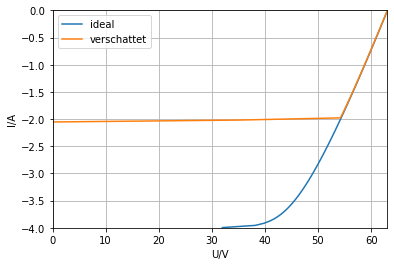

In [8]:
from scipy.optimize import bisect

Rs=0.05
Rp=1e3
Ik=[4]*71
Ik.append(2) # Bestimmt auch die Anzahl der Zellen
Iin=np.linspace(0.0,0.999*np.max(Ik),num=100)

# Spannung einer Zelle
def Ucell(I,Rs=0.1,Rp=10000,n=1.1,Ik=4,Is=1e-11):
    f = lambda Ud: -Is*(np.exp(q*(Ud)/n/k/T)-1)+Ik-Ud/Rp-I
    try:
        Ud=bisect(f,0.1,1)
        U=Ud-Rs*I
    except: # Keine Lösung, da Diode in den Sperrbereich getrieben wird
        Ud=(Ik-I)*Rp
        U=Ud-Rs*I
        print("Keine Lösung bei I=%5.4fA, verwende Diodenstrom=0, damit (fiktiv) U=%5.4fV"% (I,U))
    return U

# Ideal ausgeleuchtete Solarzelle
Uout=[]
# Simulation für verschiedene eingeprägte Stromstärken
for I in Iin:
    # Bestimmung der Modulspannung
    U=0
    for Imod in len(Ik)*[np.max(Ik)]:
        U=U+Ucell(I,Rs=Rs,Rp=Rp,Ik=Imod)
    Uout.append(U)
plt.plot(Uout,-Iin,label="ideal")

## Verschattete Solarzelle
Uout=[]
# Simulation für verschiedene eingeprägte Stromstärken
for I in Iin:
    # Bestimmung der Modulspannung
    U=0
    for Imod in Ik:
        U=U+Ucell(I,Rs=Rs,Rp=Rp,Ik=Imod)
    Uout.append(U)
plt.plot(Uout,-Iin,label="verschattet")

plt.axis([0,np.max(Uout),-np.max(Ik),0])
plt.legend()
plt.grid("both")
plt.xlabel("U/V")
plt.ylabel("I/A")


## Calculate the Theoretical Efficiency of a Solar Cell (Shockley–Queisser limit)

To do this, one needs to calculate what energy from a known spectrum can be captured by a solar cell. The captured energy can only be the portion of the spectrum's energy, that is above the bandgap. All other photons will not be absorbed and thus will not generate an electron-hole pair.

Of the photons, that do generate only the energy of the bandgap can be utilized. All energy above this level will be kinetic (thermal) energy of the electrons and cannot be used in electronic circuits.

The calculation is as follows:
1. The spectrum will be calculated, in this case we use a black body radiation that is close to the actual spectrum of the sun
2. photons with higher energy than the bandgap will be calculated
3. only the usable energy of these photons is used

**Important Note**
The calculation here is just to illustrate a theoretical limit, as has been done in the first paper of Shockley and Qeisser [1] and has been further simplified. For instance, here we assume the sun to be an ideal black body of a certain temperature. Actual effciencies of solarcells are around 24%, the theoretical limit of a solar cell with one pn-junction is 33.16%

The real limit is more like:

<div>
    Shockley Qeisser Limit after https://en.wikipedia.org/wiki/Solar-cell_efficiency
<img src="ShockleyQueisserFullCurve.svg" width="300"/>
</div>

And real solar cells are like 

<div>
    Reported timeline of research solar cell energy conversion efficiencies since 1976 (National Renewable Energy Laboratory) https://en.wikipedia.org/wiki/Solar-cell_efficiency
<img src="NREL_PV_Cell_Record_Efficiency_Chart.png" width="1000"/>
</div>




[1] Detailed Balance Limit of Efficiency of pn Junction Solar Cells, William Shockley and Hans J. Queisser, Citation: J. Appl. Phys. 32, 510 (1961); doi: 10.1063/1.1736034, View online: http://dx.doi.org/10.1063/1.1736034, View Table of Contents: http://jap.aip.org/resource/1/JAPIAU/v32/i3, Published by the American Institute of Physics. http://metronu.ulb.ac.be/npauly/art_2014_2015/shockley_1961.pdf


In [9]:
# black_body(2600,100,[100:100:2000]);
# Berechnet das Spektrum eines schwarzen Strahlers mit
# T der Temperatur
# P der Leistung
# f Vektor der Frequenzen
# lam optional vector of wavelength (in this case the spectral function related to wavelength will be given)
#
# Zurückkommen
# s1: die Leistungsdichte
def black_body(T,P,f,lam=[0],doplot=False) :
    
    c=299792458
    k=1.38064852e-23
    h=6.626070040e-34
    R=0.0000000567*T**4

    if len(lam)>1:
        s1=2*np.pi*h*c**2/lam**5/(np.exp(h*c/lam/k/T)-1)
        ph=s1/h/c*lam
        plt.figure(1)
        plt.plot(lam*1e9,s1)

        if doplot :
            plt.ylabel(r'P/(W/Hz)')
            plt.xlabel(r'\lambda/nm')

            plt.figure(2)
            plt.plot(lam*1e9,ph)
    
            plt.ylabel(r'Anzahl Photonen pro Hertz')
            plt.xlabel(r'\lambda/nm')
        
    else :
        s1=2*np.pi*h/c**2*f**3/(np.exp(h*f/k/T)-1)
        ph=s1/h/f
        
        if doplot:
            plt.figure(1)
            plt.plot(f/1e12,s1)

            plt.ylabel(r'P/(W/Hz)')
            plt.xlabel(r'f/THz')

            plt.figure(2)
            plt.plot(f/1e12,ph)
    
            plt.ylabel(r'Anzahl Photonen pro Hertz')
            plt.xlabel(r'f/THz')
    
    return s1

Power should be 73488052.47024
2992
2992
Ultimate efficiency of  44 % is with a material of bandgap 1.1000eV
Note that this cannot be achieved, since unavoidable irradiation from the
solar cell, impedance matching (MPP) and recombination is not accounted
for. This reduced max. efficiency to about 32 %.


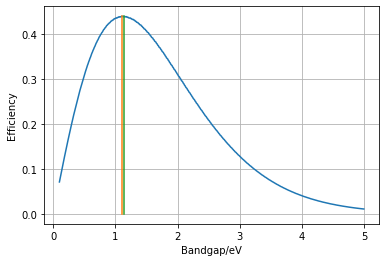

In [10]:
# Calculate the energy captured by a solar cell,
# this means: only photons with energy above the bandgap contribute,
# but only the energy of the bandgap can be utilized, the
# rest is thermal movement of the electrons

# f, bb are frequency and sprectral density of the radiation
# P total power of the radiation
# egap is a list of bandgap energies to be viewed

def solar_eff(f,bb,P,egap):
    c=299792458   # speed of light
    e=1.6022e-19  # elementary charge
    h=6.626070040e-34
    
    eff=[]
    
    for jj in range(0,len(egap)):
        phanz=0
        for ii in range(1,len(f)):
            if h*f[ii]>egap[jj] :
                phanz+=bb[ii]/h/f[ii]*(f[ii]-f[ii-1])
        eff.append(phanz*egap[jj]/P)

    return eff

lmin=100e-9
lmax=50000e-9
c=299792458   # speed of light
e=1.6022e-19  # elementary charge
h=6.626070040e-34

T=6000

sigma = 5.670374419e-8

P = sigma*T**4.0
print('Power should be',P)

f=np.arange(c/lmax,c/lmin,1e12)

lam=np.arange(lmin,lmax,(lmax-lmin)/1000.0)
lam=[0]

bb=black_body(T,P,f,lam)

print(len(f))
print(len(bb))

# calculate number of photon above a certain energy level
egap=e*np.arange(0.1,5,0.01)

eta=solar_eff(f,bb,P,egap)

plt.figure(100)
plt.plot(egap/e,eta)
plt.grid("both")
plt.xlabel("Bandgap/eV")
plt.ylabel("Efficiency")

maxpos=np.argmax(eta)

plt.plot([egap[maxpos]/e,egap[maxpos]/e],[0,eta[maxpos]])

plt.plot([1.14,1.14],[0,eta[maxpos]])

print("Ultimate efficiency of %3.0f %% is with a material of bandgap %5.4feV"% 
      (eta[maxpos]*100,egap[maxpos]/e))
print("Note that this cannot be achieved, since unavoidable irradiation from the")
print("solar cell, impedance matching (MPP) and recombination is not accounted")
print("for. This reduced max. efficiency to about 32 %.")